# Exercise 1 - Data storytelling

## 0. Tell a story from immigration

<img src="https://github.com/kokchun/assets/blob/main/data_visualization/annotate_arrow.png?raw=true" alt="bar chart and line chart" width="800">

  a) Remove clutter from this visualization such as top spine and right spine. Also change the unit to thousands with a prefix K.

  b) Left align the xlabel, top align the ylabel and left align the title

  c) Use contrast to focus the attention to what you want the audience to see

  d) Choose a story to tell and change the labels and title accordingly

  e) You can choose several different stories to tell and depending on which one you choose, the visualization might look differently in terms of what parts are annotated, what parts are highlighted etc.

In [1]:
import pandas as pd
import duckdb

df = pd.read_csv("data/1900-census-immigrant-pop-metro.csv")
df.head()

,City,State,Error,Total foreign born,Africa,"Asia (except China, Japan, and India)",Atlantic Islands,Australia,Austria,Belgium,...,Scotland,South America,Spain,Sweden,Switzerland,Turkey,Wales,West Indies (except Cuba and Puerto Rico),Other countries,Born at sea
0,Akron,Ohio,0,"7,127",4.0,NaN,NaN,1,190,9,...,187,1.0,2,200,258,NaN,226,8,NaN,6.0
1,Albany,New York,55,"17,718",3.0,39.0,4,13,106,13,...,395,1.0,1,65,64,21,80,4,3.0,15.0
2,Allegheny,Pennsylvania,0,"30,216",4.0,5.0,2,8,"3,929",10,...,"1,183",2.0,2,186,488,4,798,4,3.0,25.0
3,Allentown,Pennsylvania,3,"2,991",NaN,1.0,NaN,2,337,2,...,66,1.0,NaN,5,26,3,40,2,3.0,1.0
4,Altoona,Pennsylvania,65,"3,301",2.0,7.0,NaN,NaN,57,2,...,98,2.0,1,32,55,25,23,1,8.0,4.0


In [2]:
columns = ["Sweden", "Norway", "Finland", "Denmark", "Total foreign born"]

df_nordic = df[columns]
df_nordic

,Sweden,Norway,Finland,Denmark,Total foreign born
0,200,59,1,105,"7,127"
1,65,12,3,21,"17,718"
2,186,9,5,15,"30,216"
3,5,2,NaN,5,"2,991"
4,32,4,3,5,"3,301"
...,...,...,...,...,...
156,45,2,52,3,"12,518"
157,"7,542",269,"1,143",153,"37,652"
158,289,46,6,81,"14,634"
159,10,1,NaN,NaN,"1,304"


In [3]:
df_nordic.fillna("0", inplace=True)

C:\Users\Marcus\AppData\Local\Temp\ipykernel_10640\4068763029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nordic.fillna("0", inplace=True)


In [4]:
df_nordic

,Sweden,Norway,Finland,Denmark,Total foreign born
0,200,59,1,105,"7,127"
1,65,12,3,21,"17,718"
2,186,9,5,15,"30,216"
3,5,2,0,5,"2,991"
4,32,4,3,5,"3,301"
...,...,...,...,...,...
156,45,2,52,3,"12,518"
157,"7,542",269,"1,143",153,"37,652"
158,289,46,6,81,"14,634"
159,10,1,0,0,"1,304"


In [5]:
for column in columns:
    df[column] = df_nordic[column].str.replace(",", "").astype(int)

In [6]:
df_nordic = duckdb.query(
    """--sql
    WITH nordic AS (
        FROM 
            df
        SELECT
            State,
            SUM("Total foreign born") AS "Total foreigners",
            SUM(Sweden) AS "Swedes",
            SUM(Norway) AS "Norwegians",
            SUM(Denmark) AS "Danish",
            SUM(Finland) AS "Finnish"
        GROUP BY 
            State
    )
    FROM Nordic n
    SELECT
        *, n.Swedes + n.Norwegians + n.Danish + n.Finnish AS Nordic
    ORDER BY 
        Nordic
    DESC;
    """
).df().head()

In [7]:
df_nordic

,State,Total foreigners,Swedes,Norwegians,Danish,Finnish,Nordic
0,Illinois,627465.0,57158.0,22300.0,10374.0,447.0,90279.0
1,Minnesota,128823.0,34984.0,17087.0,2975.0,1101.0,56147.0
2,New York,1521931.0,29961.0,11752.0,6186.0,3764.0,51663.0
3,Massachusetts,567170.0,21971.0,2366.0,1451.0,3154.0,28942.0
4,Wisconsin,124230.0,4034.0,6485.0,4024.0,405.0,14948.0


In [8]:
import matplotlib.pyplot as plt
top_3_nordic = df_nordic.drop(["Total foreigners", "Nordic"], axis=1).set_index("State").iloc[:3]

In [9]:
def nordic_plot():
    ax = top_3_nordic.plot(kind= "bar", figsize=(12,6)) 
    ax.set_xticklabels(top_3_nordic.index, rotation= 0)
    
    fig = ax.get_figure()
    
    return fig, ax
    

(np.float64(57158.0), np.float64(-0.25))

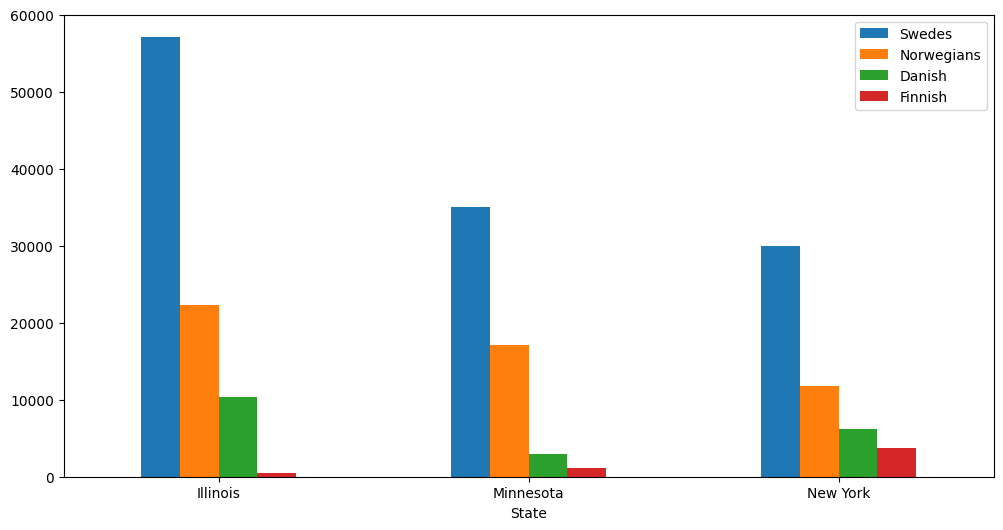

In [10]:
fig, ax = nordic_plot()
ax.containers[0][0].get_height(), ax.containers[0][0].get_x()

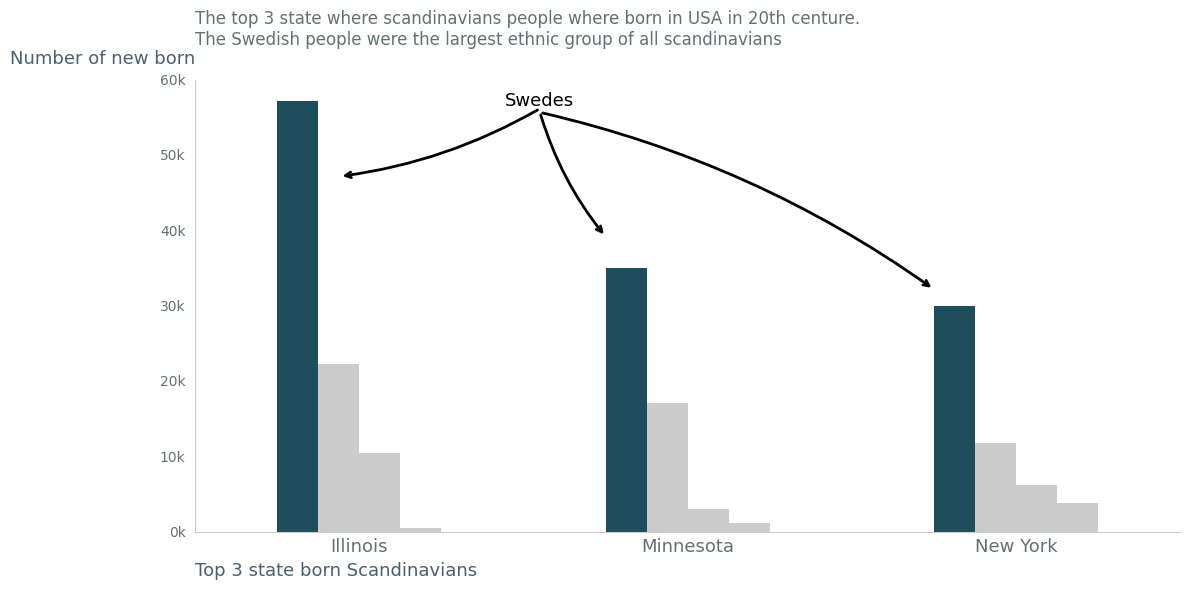

In [11]:
from matplotlib.ticker import FuncFormatter
from constant import GRAY_1, GRAY_2, GRAY_3, BLUE_1

fig, ax = nordic_plot()


# tuple unpacking of ax.containers that is a list of four BarContainers, which contains 3 Artists each
swede_bars, norwegian_bars, danish_bars, finnish_bars = ax.containers

# remove clutter
ax.spines[["top", "right"]].set_visible(False)
thousands_formatter = FuncFormatter(lambda val, pos: f"{int(val/1000)}k")
ax.yaxis.set_major_formatter(thousands_formatter)

# contrast 
ax.spines[["left", "bottom"]].set_color(GRAY_1)
ax.tick_params(axis= "both", color= GRAY_2, labelsize= 9, length= 0, pad= 5)
ax.tick_params(axis= "y", pad= 7)



# Description title and labels - call to action (CTA) 
ax.set_title("The top 3 state where scandinavians people where born in USA in 20th centure. \nThe Swedish people were the largest ethnic group of all scandinavians", 
             loc= "left", 
             pad= 25, 
             color= GRAY_2)
ax.set_ylabel("Number of new born", loc= "top", rotation=0, fontsize= 13, color= GRAY_3)
ax.tick_params(axis= "y", labelsize= 10, labelcolor= GRAY_2)
ax.yaxis.set_label_coords(-0,1.025)
ax.set_xlabel("Top 3 state born Scandinavians", loc= "left", fontsize= 13, color= GRAY_3)
ax.tick_params(axis= "x", labelsize= 13, labelcolor= GRAY_2)

# changing color on the bars
for bar in swede_bars:
    bar.set_facecolor(BLUE_1)
for bar in norwegian_bars:
    bar.set_facecolor(GRAY_1)
for bar in danish_bars:
    bar.set_facecolor(GRAY_1)
for bar in finnish_bars:
    bar.set_facecolor(GRAY_1)

xy = (swede_bars[0].get_x(), swede_bars[0].get_height())

x_pos = xy[0]
y_pos = xy[1]
ax.text(x_pos + .8, y_pos, "Swedes", fontsize= 13, ha= "center", va= "center")




ax.annotate(text= "", 
            xy= (xy[0] + 0.19,xy[1] - 10000),
            xytext= (xy[0] + .8, xy[1]+ -1000),
            arrowprops= dict(arrowstyle= "->", linewidth= 2, connectionstyle= "arc3, rad=-0.1"))

ax.annotate(text= "", 
            xy= (xy[0] + 1,xy[1] - 18000),
            xytext= (xy[0] + .8, xy[1]+ -1500),
            arrowprops= dict(arrowstyle= "->", linewidth= 2, connectionstyle= "arc3, rad=0.1"))

ax.annotate(text= "", 
            xy= (xy[0] + 2,xy[1] - 25000),
            xytext= (xy[0] + .8, xy[1]+ -1500),
            arrowprops= dict(arrowstyle= "->", linewidth= 2, connectionstyle= "arc3, rad=-0.1"))

ax.legend().remove()
fig.tight_layout()
fig.savefig("figures/storytelling_bar_chart.png")
